In [1]:
import numpy as np
import pandas as pd
import os
print(os.listdir("../input"))

['test.csv', 'train.csv', 'sample_submission.csv']


In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
# Load Classfiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifier, RidgeClassifierCV, SGDClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.semi_supervised import LabelPropagation
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier

import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
import random

/Users/Yuya/PycharmProjects/kaggle/venv/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [160]:
# For sampling
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit, KFold, StratifiedKFold
# For parameter tuning
from sklearn.model_selection import GridSearchCV
import optuna
# For Correlation
from pandas.plotting import scatter_matrix
# For Preprocessing 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # Encoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures # Edit features
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize # Scaling
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve

from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_auc_score
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_selection import RFECV
from sklearn import model_selection
from sklearn.decomposition import PCA


# For Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# 1. EDA（Exploratory Data Analysis: 探索的データ解析）を行う
train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,...,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,...,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.288558,0.515875,0.920590,-1.223277,...,0.516422,0.130521,-0.459210,2.028205,-0.093968,-0.218274,-0.163136,-0.870289,0.064038,1
3,e350f17a357f12a1941f0837afb7eb8d,0.183774,0.919134,-0.946958,0.918492,0.862278,1.155287,0.911106,0.562598,-1.349685,...,-1.168967,1.385089,-0.353028,3.316150,-0.524087,-0.794327,3.936365,0.682989,-2.521211,0
4,a8f910ea6075b6376af079055965ff68,-0.203933,-0.177252,0.368074,-0.701320,-1.104391,0.735760,0.894273,-1.375826,-5.144946,...,-0.279168,1.544356,2.959727,1.641201,-0.130818,-0.264292,-0.748668,0.964218,0.087079,0


In [8]:
train.info # 総行数、各属性のタイプとnullではない値の数

<bound method DataFrame.info of                                       id  muggy-smalt-axolotl-pembus  \
0       707b395ecdcbb4dc2eabea00e4d1b179                   -2.070654   
1       5880c03c6582a7b42248668e56b4bdec                   -0.491702   
2       4ccbcb3d13e5072ff1d9c61afe2c4f77                   -1.680473   
3       e350f17a357f12a1941f0837afb7eb8d                    0.183774   
4       a8f910ea6075b6376af079055965ff68                   -0.203933   
5       60cf059121122100e9d23bc3d4b7e9bc                   -1.114752   
6       1b4478137cc9b9577d07663092400294                    0.970029   
7       b2c7f197f1621f5a4d12c79fa29fbd34                   -1.257939   
8       5c3cff9e34e20977485f0ad2a56da835                   -0.155789   
9       f9c5e3b0632b1628a400c497d04dbfe8                    1.381869   
10      7921f8c46e226bfdde1e505ec17d97b2                   -1.389209   
11      149f68a2d8c3b272b3f1dcea4551a377                   -1.199521   
12      847a2ca709de0652f802d79e

In [ ]:
# train["column_name"].value_countes() # カテゴリがある場合はカテゴリとそのカテゴリのデータ数を表示

In [9]:
train.describe() # 数値属性の集計情報を表示

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
count,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,...,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000
mean,0.005924,0.000936,-0.012530,-0.005688,0.001607,0.007878,-0.003500,-0.005927,0.002664,0.020485,...,-0.002670,-0.011401,0.007895,0.000651,-0.002613,0.002351,-0.011684,-0.007153,-0.004066,0.500225
std,1.706660,1.720943,1.698693,1.874875,1.726869,1.734646,1.720431,1.693276,1.872248,1.645070,...,1.799308,1.788832,1.775853,1.703296,1.692972,1.742284,1.698231,1.759408,1.661463,0.500001
min,-15.588429,-15.644144,-15.235982,-15.672966,-16.800626,-14.789422,-15.591329,-15.696478,-17.011807,-14.693510,...,-16.740804,-17.681945,-15.705197,-15.765274,-15.604682,-16.965775,-15.064518,-16.145154,-16.815640,0.000000
25%,-0.765404,-0.770224,-0.777421,-0.802502,-0.770838,-0.771608,-0.770634,-0.764398,-0.795475,-0.756594,...,-0.782944,-0.788437,-0.778580,-0.767367,-0.764199,-0.770457,-0.768885,-0.785702,-0.766552,0.000000
50%,0.002148,0.003543,-0.005771,-0.003505,0.000866,0.002830,0.001257,-0.003657,0.004936,0.004372,...,-0.002239,-0.004543,-0.000675,0.000771,-0.000331,-0.000617,-0.005634,-0.004459,-0.004471,1.000000
75%,0.769228,0.773400,0.764092,0.798460,0.769954,0.776606,0.769794,0.752836,0.800376,0.764807,...,0.786180,0.776178,0.788910,0.769277,0.764115,0.773100,0.753518,0.774197,0.758012,1.000000
max,15.797000,18.577178,17.205310,16.585173,16.815798,17.378922,15.202100,16.645394,19.396192,17.131375,...,15.511936,16.252503,16.387990,16.260286,14.748128,16.212146,18.866005,18.811832,17.302211,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126b63a58>,
      dtype=object)

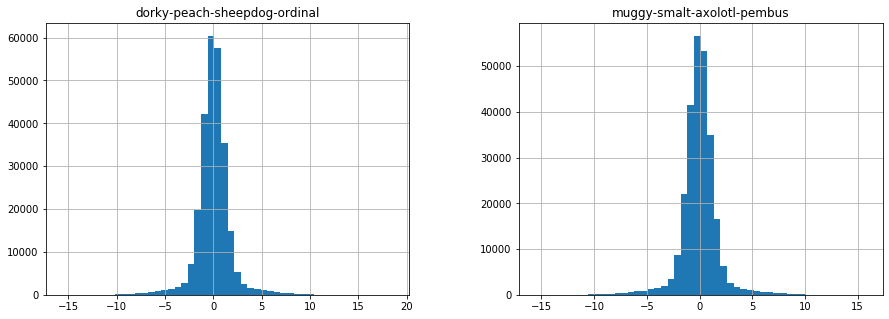

In [24]:
# データの視覚化
## ヒストグラム
train.loc[:, ["muggy-smalt-axolotl-pembus", "dorky-peach-sheepdog-ordinal"]].hist(bins=50, figsize=(15, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125c85358>,
      dtype=object)

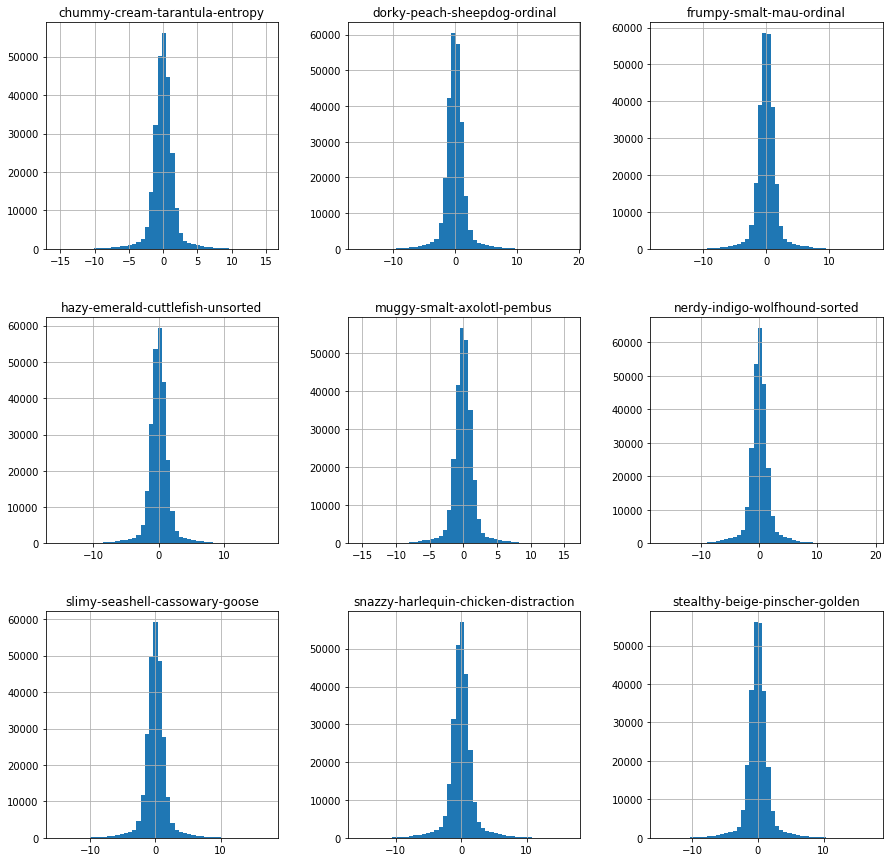

In [27]:
train.iloc[:, 0:10].hist(bins=50, figsize=(15, 15))

In [33]:
# テストセットを作る
# データスヌーピングバイアス（data snooping bias）がかからないようにする
# 無作為にサンプリングするのではなく、層化抽出法（stratified sampling）で行う
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# split.splitの二つ目の引数は層化抽出するカラムをセットする。その値をとるデータが複数存在する必要がある。
for train_index, test_index in split.split(train, train["wheezy-copper-turtle-magic"]):
    strat_train_set = train.loc[train_index]
    strat_test_set = train.loc[test_index]

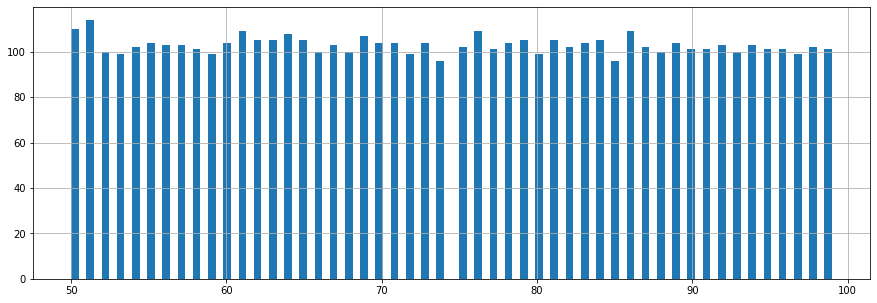

In [65]:
# ヒストグラム
weezy = strat_test_set["wheezy-copper-turtle-magic"]
weezy.where((weezy >= 50) & (weezyb < 100)).hist(bins=100, figsize=(15, 5))

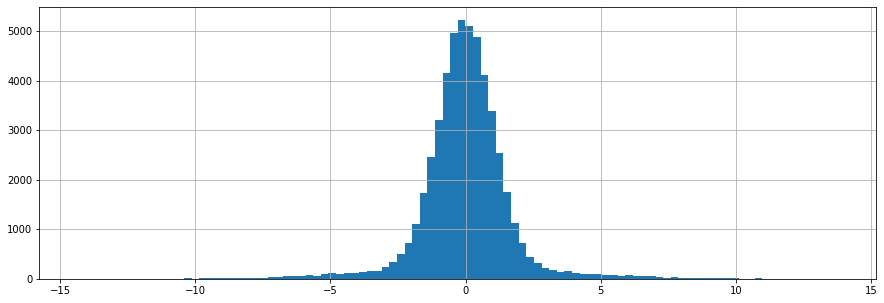

In [78]:
strat_test_set["muggy-smalt-axolotl-pembus"].hist(bins=100, figsize=(15, 5))

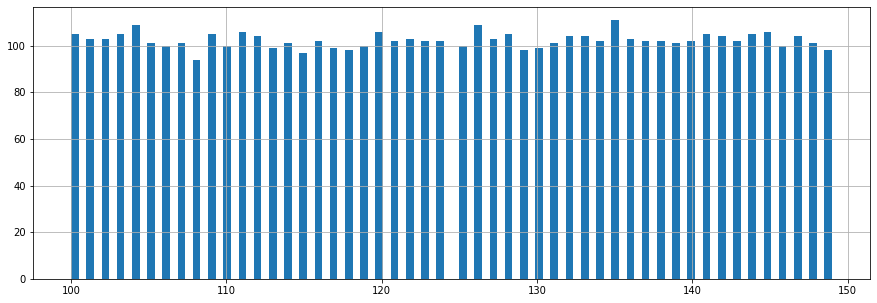

In [91]:
weezy.where((weezy >= 100) & (weezy < 150)).hist(bins=100, figsize=(15, 5))

In [92]:
# カテゴリごとの割合を把握
strat_test_set["wheezy-copper-turtle-magic"].value_counts() / len(strat_test_set)

51     0.002174
298    0.002117
489    0.002117
135    0.002117
245    0.002117
180    0.002098
50     0.002098
311    0.002079
76     0.002079
104    0.002079
126    0.002079
335    0.002079
299    0.002079
61     0.002079
86     0.002079
28     0.002060
64     0.002060
444    0.002060
268    0.002060
41     0.002060
460    0.002060
150    0.002060
391    0.002060
22     0.002060
3      0.002060
452    0.002060
441    0.002060
373    0.002060
506    0.002041
250    0.002041
         ...   
244    0.001850
32     0.001850
13     0.001850
447    0.001850
306    0.001850
207    0.001850
329    0.001850
337    0.001850
389    0.001850
115    0.001850
179    0.001850
330    0.001850
360    0.001850
375    0.001850
490    0.001831
340    0.001831
422    0.001831
157    0.001831
402    0.001831
11     0.001831
339    0.001831
85     0.001831
233    0.001831
74     0.001831
215    0.001812
501    0.001812
277    0.001812
108    0.001793
42     0.001793
185    0.001678
Name: wheezy-copper-turt

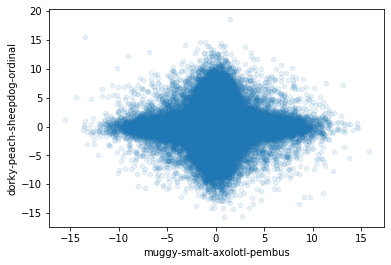

In [83]:
# 散布図
# 密集度（alpha）、カラーマップ etc
# Cheet sheet for Data Visualization: https://www.tapchief.com/insights/cpasupuleti/cheat-sheet-for-data-visualization-NGJkOWFh
train.plot(kind="scatter", x="muggy-smalt-axolotl-pembus", y="dorky-peach-sheepdog-ordinal", alpha=0.1)

In [88]:
# 相関を探す
# https://ja.wikipedia.org/wiki/%E7%9B%B8%E9%96%A2%E4%BF%82%E6%95%B0#/media/%E3%83%95%E3%82%A1%E3%82%A4%E3%83%AB:Correlation_examples2.svg
# 1に近ければ正の相関
# 非線形の相関は捕捉できない
# 相関係数と直線の傾き具合には関係がない
corr_matrix = train.iloc[:,:10].corr()
corr_matrix

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted
muggy-smalt-axolotl-pembus,1.000000,-0.004407,0.005167,-0.000854,0.002725,0.000069,-0.003075,-0.000066,-0.002264
dorky-peach-sheepdog-ordinal,-0.004407,1.000000,0.002148,-0.004639,0.005838,-0.000919,-0.004736,0.004086,0.002442
slimy-seashell-cassowary-goose,0.005167,0.002148,1.000000,0.001177,-0.004920,0.004841,-0.002878,0.002958,-0.003941
snazzy-harlequin-chicken-distraction,-0.000854,-0.004639,0.001177,1.000000,0.005921,-0.003016,-0.001507,-0.007333,-0.004590
frumpy-smalt-mau-ordinal,0.002725,0.005838,-0.004920,0.005921,1.000000,-0.000347,-0.003364,-0.002313,-0.000603
stealthy-beige-pinscher-golden,0.000069,-0.000919,0.004841,-0.003016,-0.000347,1.000000,0.003659,-0.001860,0.003279
chummy-cream-tarantula-entropy,-0.003075,-0.004736,-0.002878,-0.001507,-0.003364,0.003659,1.000000,0.003291,0.000525
hazy-emerald-cuttlefish-unsorted,-0.000066,0.004086,0.002958,-0.007333,-0.002313,-0.001860,0.003291,1.000000,-0.001765
nerdy-indigo-wolfhound-sorted,-0.002264,0.002442,-0.003941,-0.004590,-0.000603,0.003279,0.000525,-0.001765,1.000000


In [90]:
# 一つの指標で並べ替えてみる
corr_matrix["dorky-peach-sheepdog-ordinal"].sort_values(ascending=False)

dorky-peach-sheepdog-ordinal            1.000000
frumpy-smalt-mau-ordinal                0.005838
hazy-emerald-cuttlefish-unsorted        0.004086
nerdy-indigo-wolfhound-sorted           0.002442
slimy-seashell-cassowary-goose          0.002148
stealthy-beige-pinscher-golden         -0.000919
muggy-smalt-axolotl-pembus             -0.004407
snazzy-harlequin-chicken-distraction   -0.004639
chummy-cream-tarantula-entropy         -0.004736
Name: dorky-peach-sheepdog-ordinal, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1354a70f0>,
      dtype=object)

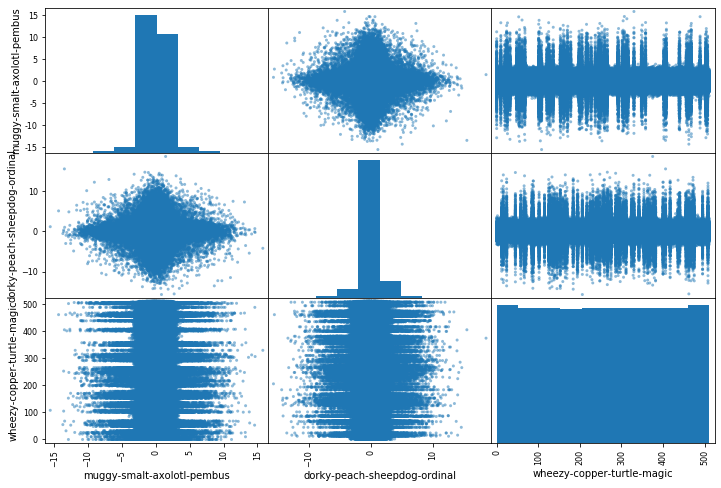

In [97]:
# Pandasのscatter_materixを利用する
attributes = ["muggy-smalt-axolotl-pembus", "dorky-peach-sheepdog-ordinal", "wheezy-copper-turtle-magic"]
scatter_matrix(train[attributes], figsize=(12, 8))

In [115]:
# 属性の組み合わせ
# 掛け算・割り算
# 交互作用特徴量（interaction feature）：複数の特徴量の積として定義される
# 2つの特徴量の積はペアワイズ交互作用特徴量と呼ぶ
# 数値の場合: 通常の掛け算、二値特徴量の場合：論理積
# 例）居住地域と年齢を別々に考えるより、「ボストンに住む20才」の方が役に立つ場合がある
# 元の特徴量がn個ある場合、ペアワイズ交互作用特徴量はn^2個作成される
# 機械学習のための特徴量エンジニアリング 2.5 交互相互作用特徴量 参照

In [112]:
X = train[["muggy-smalt-axolotl-pembus", "dorky-peach-sheepdog-ordinal"]]
y = train["target"]
print(X.shape)
X2 = PolynomialFeatures(include_bias=False).fit_transform(X)

(262144, 2)


In [114]:
# 元々のデータとペアワイズ交互作用特徴量で作成した新たな特徴量セットで訓練データとテストデータに分ける
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.2, random_state=42)

In [117]:
# 特徴量選択（feature selection）
# 有用でない特徴r法を取り除く
# 特徴量選択は学習時間を削減するとは限らない。（特徴選択の手法の中に複数の候補モデルを学習するものもあるため）
# フィルタ法:特徴量とターゲット変数の相関や相互情報量を計算し、閾値より小さければ削除する。モデルにとって良い特徴量を選んでいるかは不明。
# ラッパー法：特徴量の一部を使って実際にモデルを学習し、精度を調べる。計算コスト大。
# 組み込み法：モデルの学習プロセスに特徴選択が組み込まれていることを指す。決定木の学習プロセスには特徴選択が組み込まれている。
# 機械学習のための特徴量エンジニアリング 2.6 交互相互作用特徴量 参照

In [118]:
# データのクリーニング
## 対応する区域を取り除く dropna
## 属性全体を取り除く drop
## 何らかの値を設定する（0, 平均値、中央値 etc） fillna

In [121]:
# imputer = Imputer(strategy="median")
# imputer.fit(train)
# imputer.statistics_ # 結果の格納
# X = imputer.transform(train) # あるいは、X = imputer.fit_transform(train)
# 結果はnumpy配列なので、DataFrameに変換する
# X = pd.DataFrame(X, columns=columns)

In [126]:
# テキスト・カテゴリ属性の処理
# 整数カテゴリ化: factorize 
# ワンホットエンコーディング： OneHotEncoder

In [130]:
train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,...,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,...,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.288558,0.515875,0.920590,-1.223277,...,0.516422,0.130521,-0.459210,2.028205,-0.093968,-0.218274,-0.163136,-0.870289,0.064038,1
3,e350f17a357f12a1941f0837afb7eb8d,0.183774,0.919134,-0.946958,0.918492,0.862278,1.155287,0.911106,0.562598,-1.349685,...,-1.168967,1.385089,-0.353028,3.316150,-0.524087,-0.794327,3.936365,0.682989,-2.521211,0
4,a8f910ea6075b6376af079055965ff68,-0.203933,-0.177252,0.368074,-0.701320,-1.104391,0.735760,0.894273,-1.375826,-5.144946,...,-0.279168,1.544356,2.959727,1.641201,-0.130818,-0.264292,-0.748668,0.964218,0.087079,0


In [177]:
# スケーリング
# 最小最大スケーリング： MinMaxScaler（正規化：normalizationとも呼ぶ）　0から1まで取るように値をスケーリングし直すだけ
# 標準化： StandardScaler　値から平均値を引き、その値を標準偏差で割る。上下限がない。NNは[0, 1]を前提としているので問題になることも。
# L2正規化：　normalize(X, "l2")： l2ノルム（ユークリッドノルム）で割ることで特徴量を正規化する。
feature_cols = [c for c in train.columns if c not in ['id', 'wheezy-copper-turtle-magic', 'target']]
X_train = train[feature_cols]
X_train_min_max = MinMaxScaler().fit_transform(X_train)
X_train_standard = StandardScaler().fit_transform(X_train)
X_train_l2_normalize = normalize(X_train, axis=0)

In [147]:
X_train_min_max_df= pd.DataFrame(X_train_min_max, columns=feature_cols)
X_train_min_max_df.head()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,...,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert
0,0.430702,0.486898,0.476696,0.512435,0.501329,0.466910,0.298968,0.498915,0.447425,0.454565,...,0.537399,0.529961,0.539298,0.441302,0.510950,0.534265,0.531816,0.451263,0.438781,0.487193
1,0.481011,0.459561,0.469303,0.519070,0.489471,0.457195,0.509911,0.473507,0.460948,0.486333,...,0.422292,0.499049,0.484341,0.570793,0.477294,0.566207,0.539426,0.448459,0.439928,0.506773
2,0.443134,0.482292,0.436474,0.508805,0.609198,0.468721,0.523073,0.513794,0.433656,0.429341,...,0.486087,0.535062,0.524908,0.475054,0.555602,0.511014,0.504778,0.439173,0.436962,0.494746
3,0.502533,0.484005,0.440458,0.514334,0.525425,0.495665,0.535908,0.502725,0.430184,0.424535,...,0.399025,0.482807,0.561878,0.478362,0.595819,0.496843,0.487416,0.559994,0.481396,0.418972
4,0.490180,0.451967,0.480994,0.464120,0.466922,0.482623,0.535361,0.442790,0.325941,0.397324,...,0.490667,0.510395,0.566572,0.581585,0.543518,0.509800,0.503391,0.421917,0.489441,0.495422


In [148]:
X_train_standard_df = pd.DataFrame(X_train_standard, columns=feature_cols)
X_train_standard_df.head()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,...,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert
0,-1.216752,0.591086,0.141976,0.460249,0.029339,0.128225,-3.709305,0.262979,-0.387027,-0.150457,...,1.397478,0.197057,0.352312,-0.873001,0.350805,0.362895,0.388239,0.152360,-0.454429,-0.114106
1,-0.291579,0.047479,0.000787,0.574415,-0.201494,-0.051934,0.066308,-0.222319,-0.124067,0.464112,...,-0.655710,-0.357052,-0.690222,1.467163,-0.281992,0.935577,0.533156,0.096348,-0.431647,0.287950
2,-0.988129,0.499490,-0.626168,0.397793,2.129198,0.161808,0.301887,0.547175,-0.654797,-0.638433,...,0.482220,0.288496,0.079338,-0.263032,1.190373,-0.053962,-0.126630,-0.089183,-0.490584,0.040991
3,0.104210,0.533544,-0.550088,0.492930,0.498401,0.661467,0.531615,0.335755,-0.722314,-0.731407,...,-1.070720,-0.648193,0.780673,-0.203240,1.946523,-0.308024,-0.457262,2.324806,0.392259,-1.515020
4,-0.122964,-0.103541,0.224058,-0.371029,-0.640465,0.419615,0.521831,-0.809025,-2.749432,-1.257818,...,0.563910,-0.153669,0.869707,1.662208,0.963164,-0.075728,-0.153042,-0.433973,0.552102,0.054859


In [149]:
X_train_l2_normalize_df = pd.DataFrame(X_train_l2_normalize, columns=feature_cols)
X_train_l2_normalize_df.head()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,...,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert
0,-0.002370,0.001156,0.000263,0.000893,0.000059,0.000259,-0.007249,0.000507,-0.000753,-0.000270,...,0.002721,0.000382,0.000676,-0.001696,0.000686,0.000706,0.000761,0.000284,-0.000895,-0.000228
1,-0.000563,0.000094,-0.000013,0.001116,-0.000392,-0.000093,0.000126,-0.000441,-0.000240,0.000931,...,-0.001289,-0.000700,-0.001361,0.002874,-0.000550,0.001824,0.001044,0.000175,-0.000851,0.000558
2,-0.001923,0.000977,-0.001237,0.000771,0.004160,0.000325,0.000586,0.001062,-0.001276,-0.001223,...,0.000933,0.000561,0.000143,-0.000505,0.002326,-0.000108,-0.000245,-0.000188,-0.000966,0.000075
3,0.000210,0.001043,-0.001089,0.000957,0.000975,0.001301,0.001034,0.000649,-0.001408,-0.001404,...,-0.002100,-0.001269,0.001512,-0.000388,0.003803,-0.000605,-0.000890,0.004527,0.000758,-0.002964
4,-0.000233,-0.000201,0.000423,-0.000731,-0.001249,0.000828,0.001015,-0.001587,-0.005367,-0.002432,...,0.001093,-0.000303,0.001686,0.003255,0.001882,-0.000151,-0.000296,-0.000861,0.001070,0.000102


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1716b2748>,
      dtype=object)

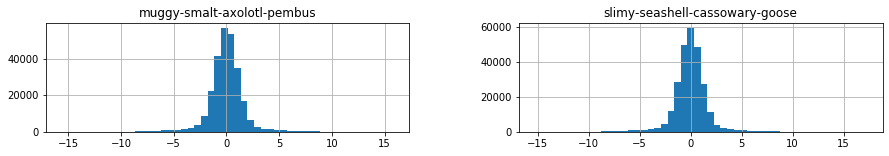

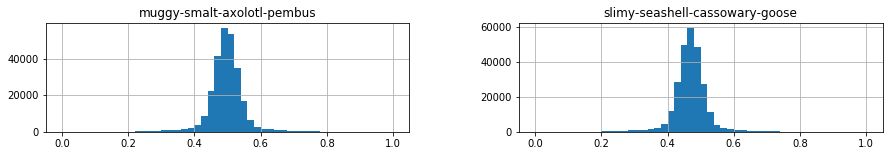

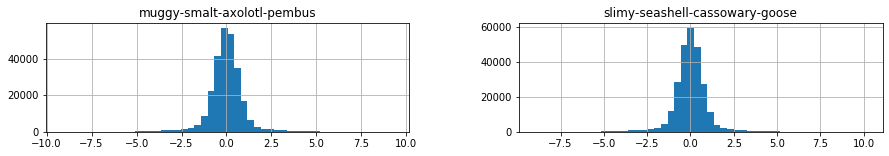

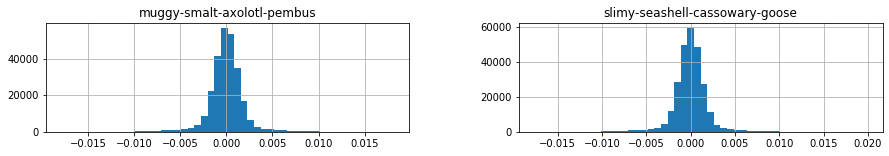

In [155]:
# 特徴量スケーリングは分布の形状を変えない
X_train.loc[:, ["muggy-smalt-axolotl-pembus", "slimy-seashell-cassowary-goose"]].hist(bins=50, figsize=(15, 2))
X_train_min_max_df.loc[:, ["muggy-smalt-axolotl-pembus", "slimy-seashell-cassowary-goose"]].hist(bins=50, figsize=(15, 2))
X_train_standard_df.loc[:, ["muggy-smalt-axolotl-pembus", "slimy-seashell-cassowary-goose"]].hist(bins=50, figsize=(15, 2))
X_train_l2_normalize_df.loc[:, ["muggy-smalt-axolotl-pembus", "slimy-seashell-cassowary-goose"]].hist(bins=50, figsize=(15, 2))

In [163]:
# データの前処理にはパイプラインを用いると良い
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("standard_scaler", StandardScaler())
])
num_pipeline.fit_transform(X_train)

array([[-1.21675193e+00,  5.91086194e-01,  1.41976040e-01, ...,
         1.52360434e-01, -4.54428710e-01, -1.14105965e-01],
       [-2.91579260e-01,  4.74790969e-02,  7.87185573e-04, ...,
         9.63479112e-02, -4.31647140e-01,  2.87950046e-01],
       [-9.88128894e-01,  4.99490303e-01, -6.26167953e-01, ...,
        -8.91826021e-02, -4.90584122e-01,  4.09907526e-02],
       ...,
       [ 3.61398046e-01, -3.51547682e-01,  3.27859354e-01, ...,
        -2.61286174e-01, -4.20582034e-01,  4.95685405e-01],
       [-3.24704261e-01,  5.78659262e-01, -6.65173320e-01, ...,
        -1.01286044e+00,  7.64326820e-02, -7.26136931e-01],
       [-1.01507040e-01, -4.64021122e-01,  5.80040841e-01, ...,
        -1.77090735e-01,  5.98881001e-01, -5.47088099e-02]])

In [ ]:
# PCA（principal component analysis, 主成分分析）

In [195]:
# モデルによる訓練
feature_cols = [c for c in train.columns if c not in ['id', 'wheezy-copper-turtle-magic', 'target']]
weezy = 20

train2 = train[train['wheezy-copper-turtle-magic']==weezy]
train2.reset_index(drop=True,inplace=True)

y_train = train2['target']
X_train = train2[feature_cols]

df = X_train.copy()
df = PCA(svd_solver='full',n_components='mle').fit_transform(df)
X_train = StandardScaler().fit_transform(df)

cv = StratifiedShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 46)
# 交差検証
cv_result = cross_val_score(
    RandomForestClassifier(),
    X_train, 
    y = y_train,
    scoring="accuracy",
    cv=cv,
    n_jobs=4)
print(f"平均：{cv_result.mean()}")
print(f"標準偏差：{cv_result.std()}")

平均：0.6597402597402598
標準偏差：0.030760309824225993


In [192]:
# scoringに用いることができる値
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# コスト関数（低い方が良い）ではなく、有用関数（高い方が良い）を受け付ける。
# 性能の評価指標について
# roc_auc, neg_log_loss, precision, accuracy
# https://scikit-learn.org/stable/modules/model_evaluation.html

In [196]:
cv_result = cross_val_score(
    QuadraticDiscriminantAnalysis(), 
    X_train, 
    y = y_train,
    scoring="accuracy",
    cv=cv,
    n_jobs=4)
print(f"平均：{cv_result.mean()}")
print(f"標準偏差：{cv_result.std()}")

平均：0.9006493506493506
標準偏差：0.0236010153836185


In [ ]:
# パラメーターチューニング
# グリッドサーチ：GridSearchCV
# optuna

In [ ]:
# 予測
# predict 予測したクラスがかえってくる
# predict_proba 予測したクラスの所属確率が返ってくる

In [198]:
def evaluate(y_train, X_train, classifiers, scoring = "accuracy", title = "Cross Validation Scores"):
    algorithms = list(map(lambda c: str(c).split('(')[0], classifiers))
    
    cv = StratifiedShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 46 )
    
    cv_results = []
    for classifier in tqdm(classifiers):
        cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = scoring, cv = cv, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in cv_results:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    cv_res = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Algorithm":algorithms})

    plt.figure()
    g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
    g.set_xlabel(f"Mean {scoring}")
    g = g.set_title(title)

    r = list(zip(algorithms, cv_means))
    r.sort(key=lambda x: x[1])
    max_result = r[-1]
    print(f"Max {scoring}: ", max_result)

In [199]:
def preprocess_features(df_):
    df = df_.copy()

    # PCA
    # df = PCA(n_components=40, random_state=4).fit_transform(df)
    df = PCA(svd_solver='full',n_components='mle').fit_transform(df)
    df = StandardScaler().fit_transform(df)

    # variance
    # df = VarianceThreshold(threshold=1.5).fit_transform(df)
    # df = StandardScaler().fit_transform(df)

    # TODO: LGB tokade feature importance

    return df

In [17]:
feature_cols = [c for c in train.columns if c not in ['id', 'wheezy-copper-turtle-magic', 'target']]
weezy = 20

train2 = train[train['wheezy-copper-turtle-magic']==weezy]
train2.reset_index(drop=True,inplace=True)

y_train = train2['target']
X_train = train2[feature_cols]
X_train = preprocess_features(X_train)

In [201]:
classifiers = [
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    HistGradientBoostingClassifier(),
    GaussianProcessClassifier(),
    LogisticRegression(),
    LogisticRegressionCV(),
    PassiveAggressiveClassifier(),
    RidgeClassifier(),
    RidgeClassifierCV(),
    SGDClassifier(),
    BernoulliNB(),
    GaussianNB(),
    KNeighborsClassifier(),
    # RadiusNeighborsClassifier(),
    NearestCentroid(),
    LabelPropagation(),
    LinearSVC(),
    SVC(),
    NuSVC(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    MLPClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
]


Max accuracy:  ('QuadraticDiscriminantAnalysis', 0.9025974025974026)


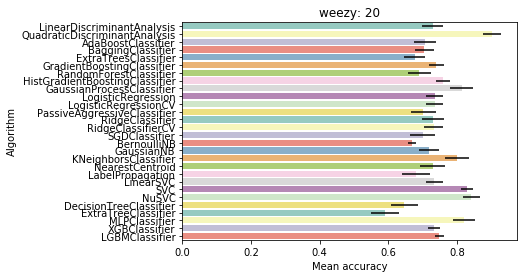

In [19]:
evaluate(y_train, X_train, classifiers, title = "weezy: " + str(weezy))

In [ ]:
feature_cols = [c for c in train.columns if c not in ['id', 'wheezy-copper-turtle-magic', 'target']]
weezy = 20

y_train = train['target']
X_train = train[feature_cols]
X_train = preprocess_features(X_train)

evaluate(y_train, X_train, classifiers, title = "weezy: " + str(weezy))